# Rozwiązywanie układów równań liniowych

## Zadanie 1 Metoda Gaussa-Jordana

### Napisz i sprawdź funkcję rozwiązującą układ równań liniowych n×n metodą Gaussa-Jordana z częściowym poszukiwaniem elementu wiodącego. 

In [1]:
import numpy as np
import pandas as pd
import time
import random

In [2]:
def Gauss_Jordan_method(A, B):
    n = A.shape[0]
    A = A.copy()
    B = B.copy()
    
    for i in range(n):
   
        max_value = abs(A[i][i])
        p = i
        for k in range(i, n):
            if abs(A[k][i]) > max_value:
                p = k
                max_value = abs(A[k][i])
        max_value = 0
        
        A[[p, i]] = A[[i, p]]
        B[[p, i]] = B[[i, p]]
        
        for j in range(n):
            if j != i:
                divisor = A[j][i] / A[i][i]
                B[j] -= divisor * B[i]
                A[j,:] -= divisor * A[i,:]
    
    return B/np.diag(A)

### Dla dziesięciu różnych rozmiarów  macierzy  współczynników  większych  niż  500×500  porównaj  czasy  działania zaimplementowanej funkcji z czasami uzyskanymi dla wybranych funkcji bibliotecznych.

In [3]:
def test_Gauss_Jordan(n):
    A = np.random.rand(n, n)
    B = np.random.rand(n)

    start = time.time()
    np_result = np.linalg.solve(A, B)
    end = time.time()
    np_time = end - start
    
    start = time.time()
    jordan_result = Gauss_Jordan_method(A, B)
    end = time.time()
    jordan_time = end - start
    
    print("my version -> time:\t", jordan_time)
    print("numpy -> time:\t\t", np_time)
    print("results are the same:\t", np.allclose(np_result, jordan_result))
    print("\n")

In [4]:
T = [500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
for x in T:
    test_Gauss_Jordan(x)

my version -> time:	 1.1002566814422607
numpy -> time:		 0.005554914474487305
results are the same:	 True


my version -> time:	 1.3927080631256104
numpy -> time:		 0.0019931793212890625
results are the same:	 True


my version -> time:	 1.6965422630310059
numpy -> time:		 0.002994537353515625
results are the same:	 True


my version -> time:	 2.00801420211792
numpy -> time:		 0.004002094268798828
results are the same:	 True


my version -> time:	 2.365809679031372
numpy -> time:		 0.004003763198852539
results are the same:	 True


my version -> time:	 2.7233612537384033
numpy -> time:		 0.0049855709075927734
results are the same:	 True


my version -> time:	 3.164719581604004
numpy -> time:		 0.004990577697753906
results are the same:	 True


my version -> time:	 3.588806629180908
numpy -> time:		 0.006001710891723633
results are the same:	 True


my version -> time:	 4.044250965118408
numpy -> time:		 0.007982492446899414
results are the same:	 True


my version -> time:	 4.545177221

## Zadanie 2 Faktoryzacja LU


### Napisz i przetestuj funkcję dokonującą faktoryzacji A = LU macierzy A (bez poszukiwania elementu wiodącego). Sprawdź poprawność wyniku obliczając ‖A − LU‖. Zadbaj o to żeby implementacja była in-situ. Elementy macierzy L to współczynniki mnożenia umożliwiające wyzerowanie odpowiedniego współczynnika macierzy A w trakcie procesu eliminacji.

In [5]:
def LU_factorization(A):
    n = A.shape[0]
    A = A.copy()
    # original is used so we have original matrix with swapped rows 
    # (we use it only to check correctness of our process at the end) so the whole implementation is indeed in-situ
    original = A.copy()
    
    for i in range(n):
        # swapping rows if we encounter 0 in i-th column of current row
        p = i
        while p < n and A[p][i] == 0:
            p += 1
        A[[p, i]] = A[[i, p]]
        original[[p, i]] = original[[i, p]]
        
        for j in range(i+1, n):
            A[j][i] /= A[i][i]
            A[j, i+1:] -= A[j][i] * A[i, i+1:]
            
    # we saved results in matrix A(under diagonal informations about L),
    # so now we can read L and U matrixes for final comparision     
    L, U = get_LU_from_factorized_matrix(A)
            
    return L, U, original

In [6]:
def get_LU_from_factorized_matrix(A):
    n = A.shape[0]
    L = A.copy()
    U = A.copy()
    for i in range(n):
        for j in range(n):
            if i == j:
                L[i][j] = 1
            elif i < j:
                L[i][j] = 0
            else:
                U[i][j] = 0
    return L, U

### funkcja testuje factoryzację LU dla losowej macierzy o rozmiarze n x n

In [7]:
def test_LU_factorization(n):
    X = np.random.rand(n, n)
    start = time.time()
    L, U, X_ = LU_factorization(X)
    end = time.time()
    print("n:\t", n)
    print("correct?", np.allclose(L@U, X_))
    print("time:\t", end - start)
    print("\n")

In [8]:
T = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]
for x in T:
    test_LU_factorization(x)

n:	 500
correct? True
time:	 0.6091418266296387


n:	 600
correct? True
time:	 0.9079134464263916


n:	 700
correct? True
time:	 1.2723000049591064


n:	 800
correct? True
time:	 1.6655006408691406


n:	 900
correct? True
time:	 2.1214916706085205


n:	 1000
correct? True
time:	 2.6399548053741455


n:	 1100
correct? True
time:	 3.2408664226531982


n:	 1200
correct? True
time:	 3.8953511714935303


n:	 1300
correct? True
time:	 4.591754198074341


n:	 1400
correct? True
time:	 5.436900854110718




## Zadanie 3 Analiza obwodu elektrycznego - nadokreślony układ równań

### Napisz program, który:

### a) Wczytuje z pliku listę krawędzi grafu nieskierowanego ważonego opisującego obwód elektryczny. Wagi krawędzi określają opór fragmentu obwodu między dwoma węzłami. Wierzchołki grafu identyfikowane są przez liczby naturalne.

In [9]:
def read_undirected_weighted_graph(file_name):
    # each line of a file should have form of: vertice1 vertice2 resistance_of_edge_between_them
    # i.e 0 1 5.61244 -> edge from 0 to 1 with resistance 5.61244
    list_of_edges = []  

    file = open(file_name, "r")
    lines = file.readlines()
    for line in lines:
        s = line.split()
        if (len(s)):
            v1, v2, r = int(s[0]), int(s[1]), float(s[2])
            list_of_edges.append((min(v1,v2), max(v1,v2), r))

    file.close()
    return list_of_edges

### b) Wczytuje  dodatkowo  trójkę  liczb  (s, t, E),  przy  czym  para  (s, t)  wskazuje  między którymi węzłami sieci przyłożono siłę elektromotoryczną E. Opór wewnętrzny SEM można zaniedbać.

In [10]:
def read_force(file_name):
    # file should have form of one line with: vertice1 vertice2 SEM_force
    # i.e 0 1 5.61244 -> SEM_force 5.61244 between vertices 0 and 1
    file = open(file_name, "r")
    lines = file.readlines()
    for line in lines:
        x = line.split()
        s,t,E = int(x[0]), int(x[1]), float(x[2])

    file.close()
    return (s,t,E)

### c) Wykorzystując prawa Kirchhoffa (albo metodę potencjałów węzłowych) znajduje natężenia prądu w każdej części obwodu i przedstawia je na rysunku w postaci grafu ważonego z etykietami (wizualizacja grafu wraz z kolorowymi krawędziami pokazującymi wartość natężenia prądu oraz jego kierunek)

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
def main(graph, pos=None):
    edges = get_edges_with_random_resistances(graph)
    G = make_undirected_graph(edges)
    
    edges_dictionary = make_edges_dictionary(edges)
    
    FORCE = get_random_force_on_random_edge(edges_dictionary)
    cycle_basis_with_forces = get_cycle_basis_with_forces(G, FORCE, edges_dictionary)
    A, B = get_matrixes(G, edges_dictionary, cycle_basis_with_forces)
    
    currents = np.linalg.lstsq(A, B, rcond=None)[0]
    currents_dictionary = get_currents_dictionary(edges_dictionary, currents)
    directed_graph = make_directed_graph_with_currents(currents_dictionary)
    set_currents_labels(directed_graph, currents_dictionary)
    
    check(directed_graph, currents_dictionary, edges_dictionary, FORCE)
    
    visualize(directed_graph, pos)

In [13]:
def check(directed_graph, currents_dictionary, edges_dictionary, FORCE):
    print("1st Kirchhoff Rule check: ", check_directed_graph_Kirchoff_rule_1(directed_graph, currents_dictionary))
    print("2nd Kirchhoff Rule check: ", check_directed_graph_Kirchoff_rule_2(directed_graph, currents_dictionary, edges_dictionary, FORCE))

In [14]:
def get_edges_with_random_resistances(graph, min_resistance=1, max_resistance=5):
    return [(edge[0], 
             edge[1], 
             np.random.uniform(min_resistance, max_resistance)
            ) for edge in graph.edges]

In [15]:
def make_undirected_graph(edges):
    graph = nx.Graph()
    for edge in edges:
        graph.add_edge(edge[0], edge[1], weight=edge[2])
    return graph

In [16]:
def make_edges_dictionary(edges):
    edges_dictionary = {}
    for count, edge in enumerate(edges):
        edges_dictionary[(min(edge[0], edge[1]), max(edge[0], edge[1]))] = (count, edge[2])
    return edges_dictionary

In [17]:
def get_random_force_on_random_edge(edges_dictionary, min_force=50, max_force=100):
    key = random.choice(list(edges_dictionary.keys()))
    FORCE = (key[0], key[1], np.random.rand() * np.random.randint(min_force,max_force))
    return FORCE

In [18]:
def get_cycle_basis_with_forces(graph, FORCE, edges_dictionary):
    cycle_basis = nx.cycle_basis(graph)
    cycle_basis_with_forces = []
    for cycle in cycle_basis:
        force = get_force_in_cycle(cycle, FORCE, edges_dictionary)
        cycle.append(cycle[0])
        cycle_basis_with_forces.append((cycle, force))
    return cycle_basis_with_forces

In [19]:
def get_force_in_cycle(cycle, FORCE, edges_dictionary):
    cycle_edge_indexes = get_cycle_edge_indexes(cycle, edges_dictionary)
    force_edge_index = get_edge_index(FORCE[0], FORCE[1], edges_dictionary)
    force_value = FORCE[2]
    force = force_value if force_edge_index in cycle_edge_indexes else 0
    return force

In [20]:
def get_cycle_edge_indexes(cycle, edges_dictionary):
    edge_indexes = []
    for i in range(len(cycle) - 1):
        edge_indexes.append(get_edge_index(cycle[i], cycle[i+1], edges_dictionary))
    return edge_indexes

In [21]:
def get_edge_index(_from, _to, edges_dictionary):
    return edges_dictionary[(min(_from, _to), max(_from, _to))][0]

In [22]:
def get_matrixes(graph, edges_dictionary, cycle_basis_with_forces):
    n = len(graph.edges)
    m = len(graph.nodes) + len(cycle_basis_with_forces)
    A = []
    B = []

    # 1. prawo Kirchhoffa
    for node in graph.nodes:
        B.append(0)
        row = [0] * n
        for neighbor in graph.neighbors(node):
            index = get_edge_index(node, neighbor, edges_dictionary)
            row[index] = flow_direction_from_X_to_Y(node, neighbor)
        A.append(row)

    # 2. prawo Kirchhoffa
    for cycle, force in cycle_basis_with_forces:
        B.append(force)
        row = [0] * n
        for i in range(len(cycle) - 1):
            _from = cycle[i]
            _to = cycle[i+1]
            index = get_edge_index(_from, _to, edges_dictionary)
            row[index] = get_edge_resistance(_from, _to, edges_dictionary) * flow_direction_from_X_to_Y(_from, _to)
        A.append(row)
        
    return A,B

In [23]:
def flow_direction_from_X_to_Y(X, Y):
    return 1 if X < Y else -1

In [24]:
def get_edge_resistance(_from, _to, edges_dictionary):
    return edges_dictionary[(min(_from, _to), max(_from, _to))][1]

In [25]:
def get_currents_dictionary(edges_dictionary, currents):
    dictlist = [key for key in edges_dictionary.keys()]

    currents_dictionary = {dictlist[i] : round(currents[i],2) for i in range(len(currents))}
    currents_dictionary = {}
    for i in range(len(currents)):
        if currents[i] > 0:
            currents_dictionary[(dictlist[i][0], dictlist[i][1])] = currents[i]
        else:
            currents_dictionary[(dictlist[i][1], dictlist[i][0])] = -currents[i]
    return currents_dictionary

In [26]:
def make_directed_graph_with_currents(currents_dictionary):
    graph = nx.DiGraph()
    graph.add_edges_from(currents_dictionary.keys())
    return graph

In [27]:
def set_currents_labels(graph, currents_dictionary):
    currents_labels = {}
    for key, value in currents_dictionary.items():
        currents_labels[key] = round(value, 2)
    nx.set_edge_attributes(graph, currents_labels, 'currents')

In [28]:
def check_directed_graph_Kirchoff_rule_1(graph, currents_dictionary, EPSILON=10**(-12)):
    for node in graph.nodes():
        sum_in = 0
        sum_out = 0
        for in_edge in graph.in_edges(node):
            sum_in += currents_dictionary[in_edge]
        for out_edge in graph.out_edges(node):
            sum_out += currents_dictionary[out_edge]
        if abs(sum_in - sum_out) >= EPSILON:
            return False
    return True

In [29]:
def check_directed_graph_Kirchoff_rule_2(graph, currents_dictionary, edges_dictionary, FORCE, EPSILON=10**(-12)):
    for cycle in nx.simple_cycles(graph):
        cycle.append(cycle[0])
        sum_of_tension = 0
        for i in range(len(cycle) - 1):
            sum_of_tension += currents_dictionary[(cycle[i], cycle[i+1])] * get_edge_resistance(cycle[i], cycle[i+1], edges_dictionary)
        if abs(sum_of_tension - FORCE[2]) >= EPSILON and abs(sum_of_tension) >= EPSILON:
            return False
    return True

In [30]:
def visualize(directed_graph, pos=None, plt_size=(10,10)):
    if pos == None:
        pos = nx.circular_layout(directed_graph)
    labels = nx.get_edge_attributes(directed_graph, 'currents')
    plt.figure(figsize=plt_size)
    nx.draw(directed_graph, pos, node_color='red', edge_color='black', with_labels=True)
    nx.draw_networkx_edge_labels(directed_graph, pos, edge_labels=labels, font_color='red', font_size=10)
    plt.show()

### d)  Przedstaw (wizualizacja + automatyczne sprawdzenie poprawności wyników) działanie programu dla grafów spójnych mających od 15 do 200 wierzchołków. Rozważ następujące typy grafów:

### – Spójny graf losowy (Erdos-Renyi)

In [31]:
Graph1a = nx.erdos_renyi_graph(15, 0.5, directed=False)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


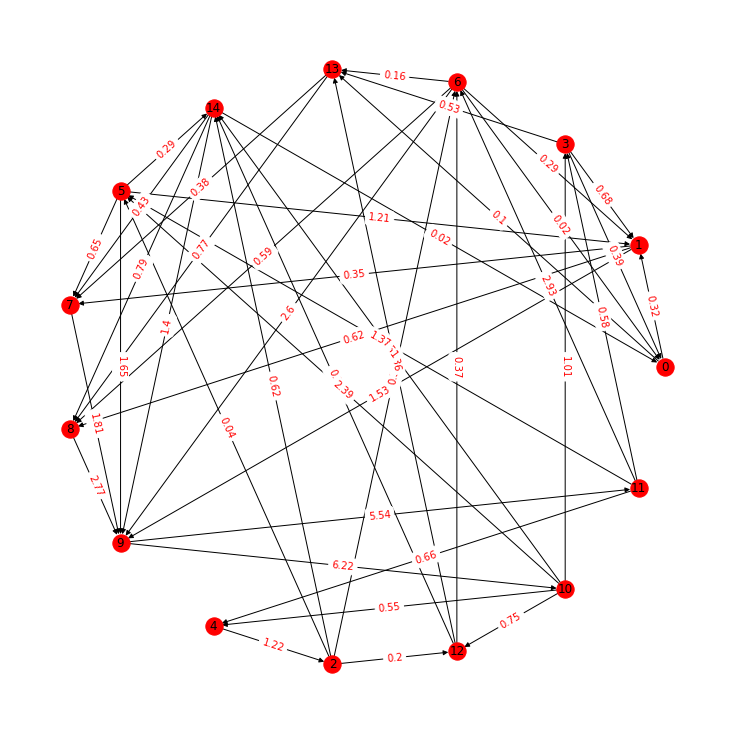

In [32]:
main(Graph1a)

In [33]:
Graph1b = nx.erdos_renyi_graph(30, 0.25, directed=False)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


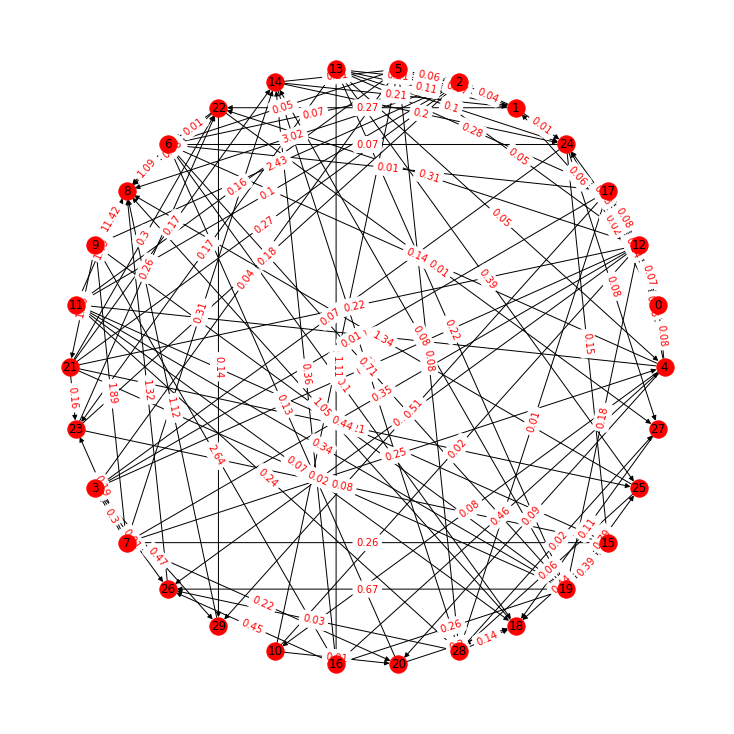

In [34]:
main(Graph1b)

In [35]:
Graph1c = nx.erdos_renyi_graph(50, 0.1, directed=False)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


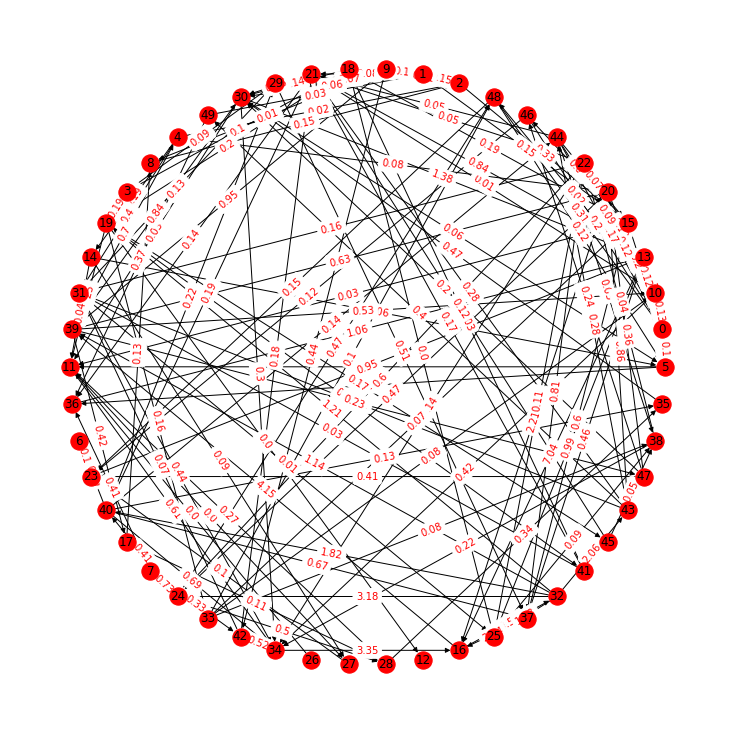

In [36]:
main(Graph1c)

In [37]:
Graph1d = nx.erdos_renyi_graph(100, 0.05, directed=False)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


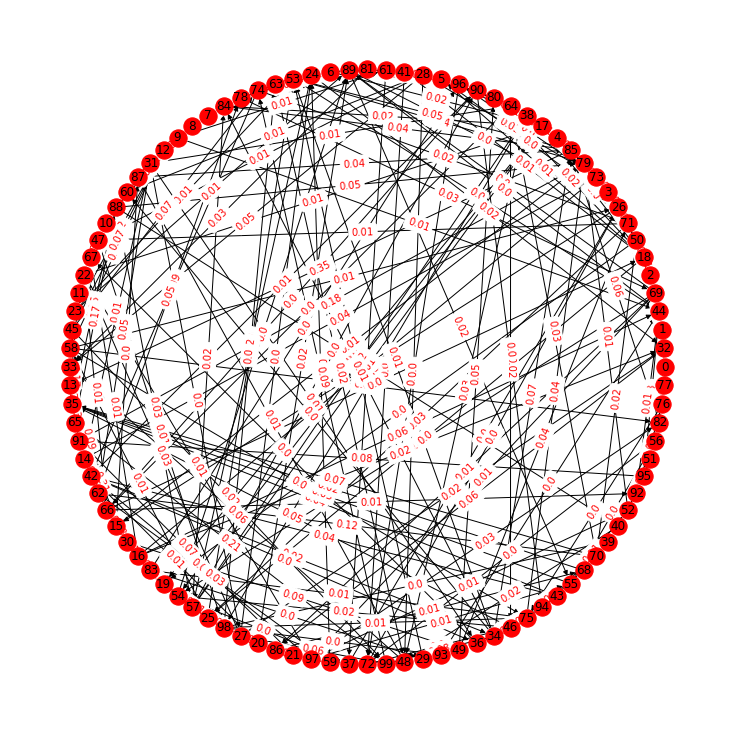

In [38]:
main(Graph1d)

In [39]:
Graph1e = nx.erdos_renyi_graph(200, 0.03, directed=False)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


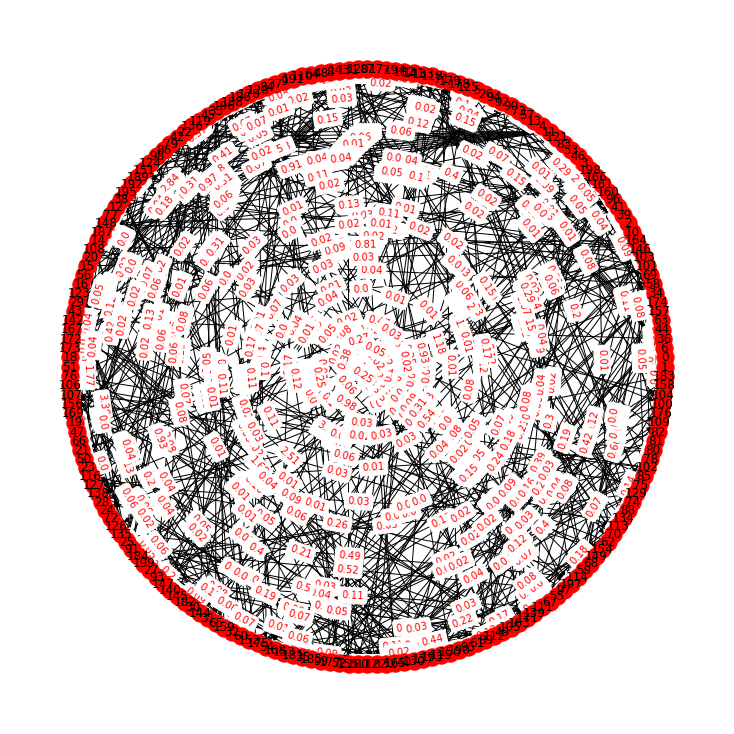

In [40]:
main(Graph1e)

### – Graf 3-regularny (kubiczny)

In [41]:
Graph2a = nx.random_regular_graph(3, 16)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


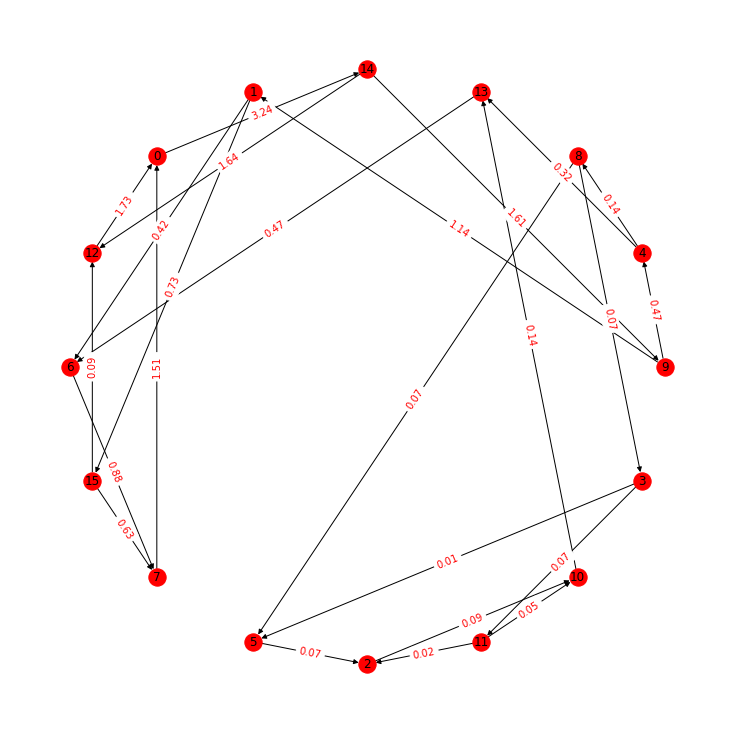

In [42]:
main(Graph2a)

In [43]:
Graph2b = nx.random_regular_graph(3, 32)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


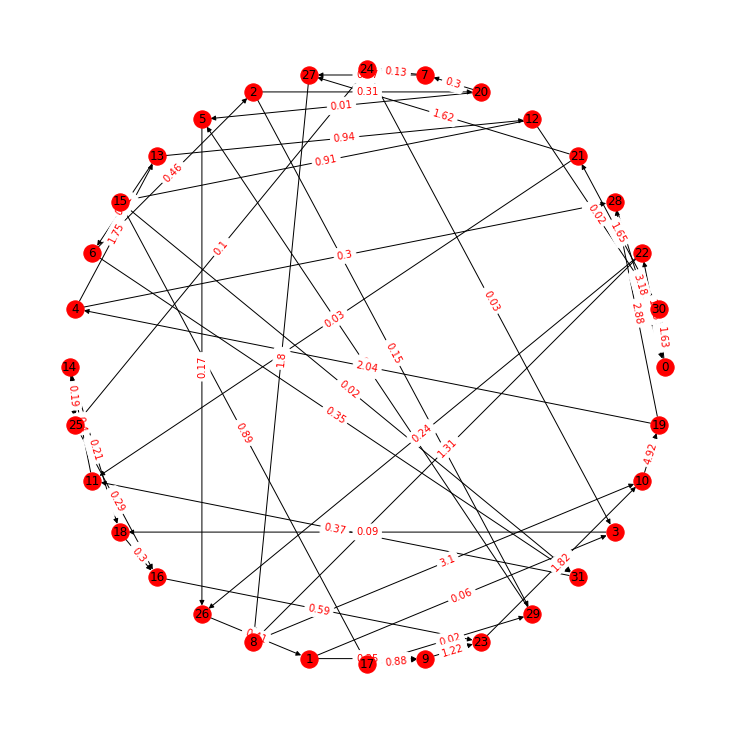

In [44]:
main(Graph2b)

In [45]:
Graph2c = nx.random_regular_graph(3, 64)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


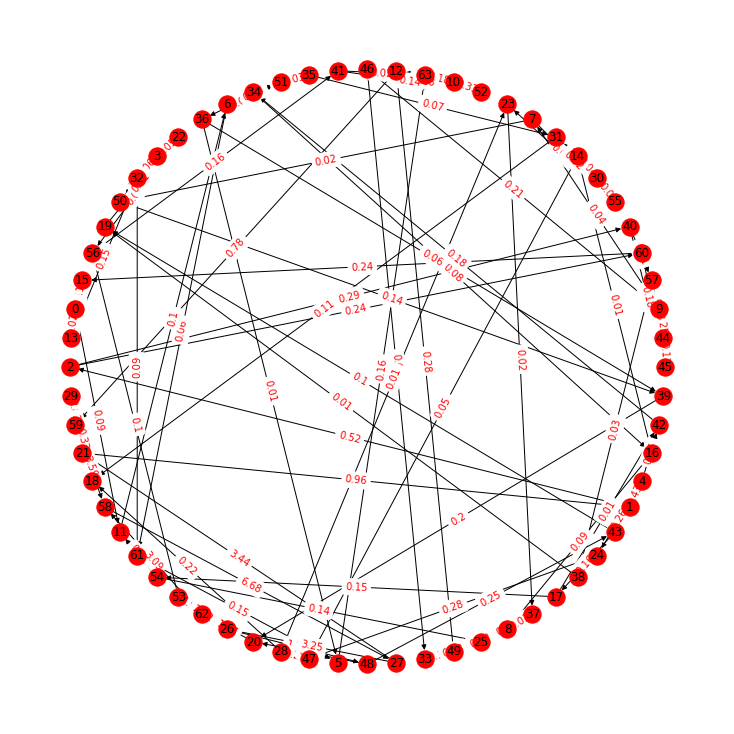

In [46]:
main(Graph2c)

In [47]:
Graph2d = nx.random_regular_graph(3, 128)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


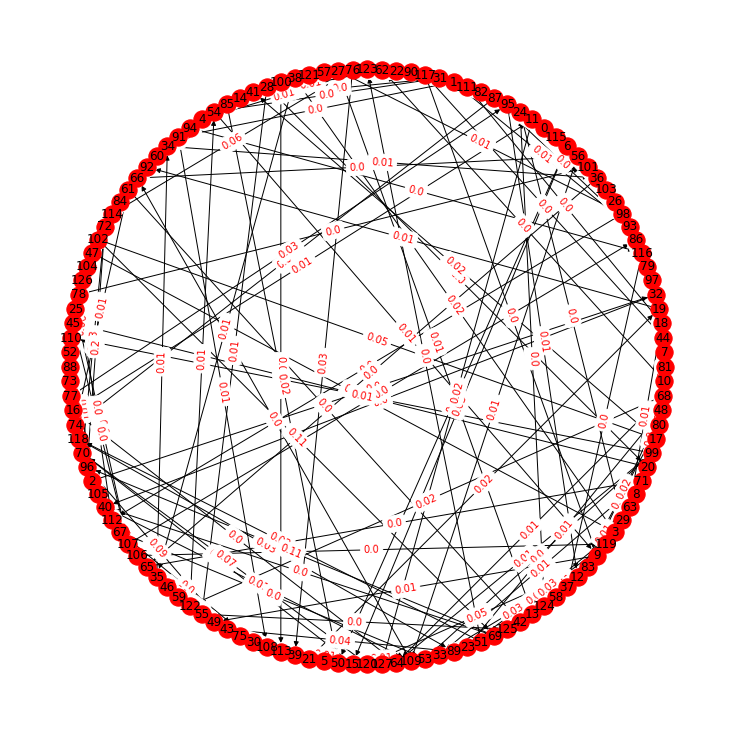

In [48]:
main(Graph2d)

In [49]:
Graph2e = nx.random_regular_graph(3, 200)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


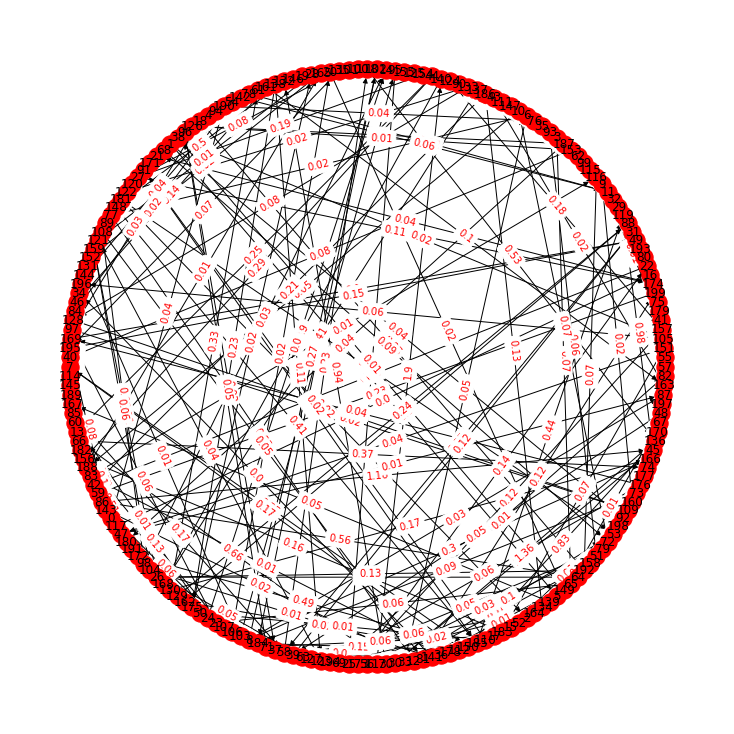

In [50]:
main(Graph2e)

### – Graf złożony z dwóch grafów losowych połaczonych mostkiem

In [51]:
def get_dict(n):
    dictionary = {}
    for i in range(n):
        dictionary[i] = 1000 + i
    return dictionary

In [52]:
def get_graph(nodes_in_single_graph, p=0.5):
    G3_a = nx.gnp_random_graph(nodes_in_single_graph, p)
    G3_b = nx.gnp_random_graph(nodes_in_single_graph, p)
    G3_b = nx.relabel_nodes(G3_b, get_dict(nodes_in_single_graph))
    G3_connector = nx.from_edgelist([(0, 2000), (2000, 1000)])
    return nx.compose_all([G3_a, G3_b, G3_connector])

In [53]:
Graph3a = get_graph(15)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


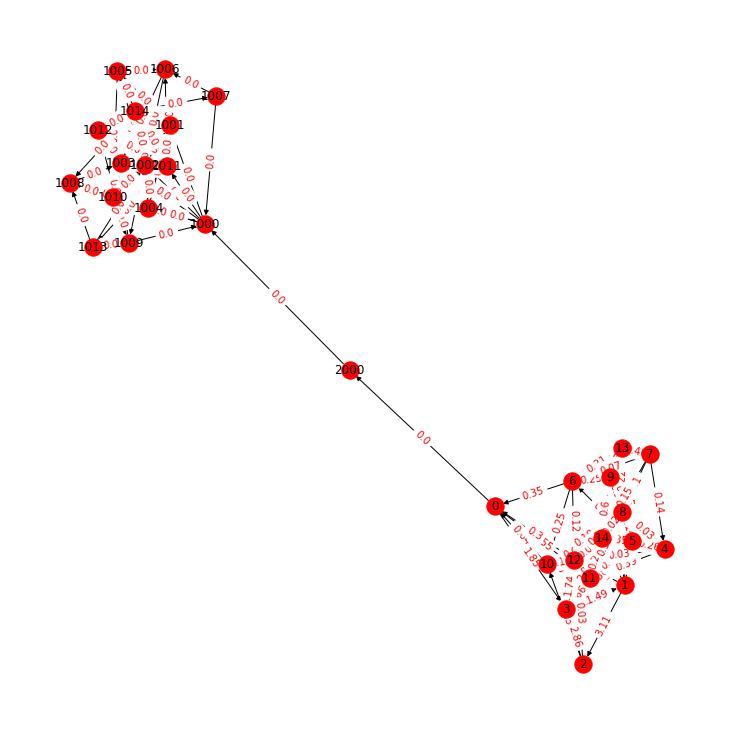

In [54]:
main(Graph3a, pos=nx.spring_layout(Graph3a))

In [55]:
Graph3b = get_graph(30, p=0.2)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


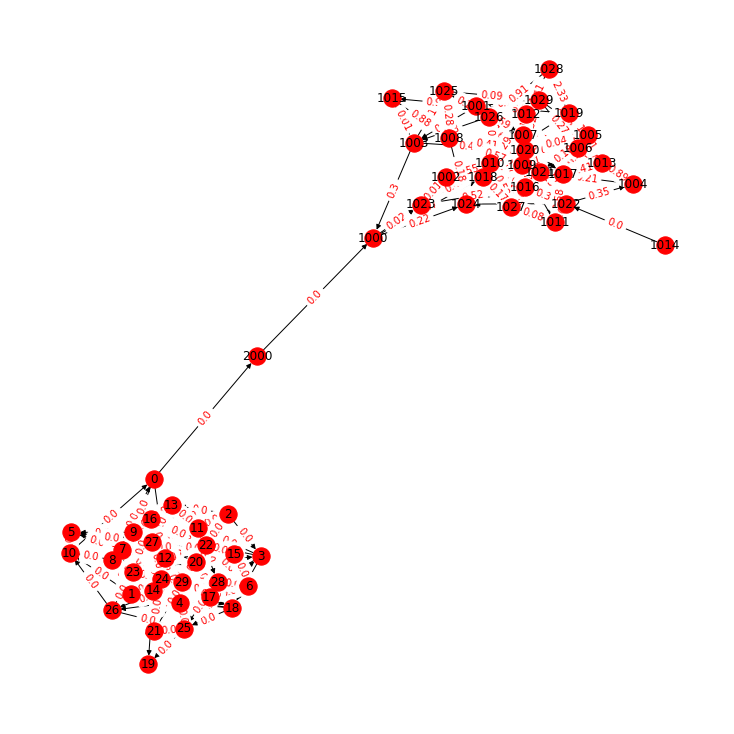

In [56]:
main(Graph3b, pos=nx.spring_layout(Graph3b))

In [57]:
Graph3c = get_graph(50, p = 0.1)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


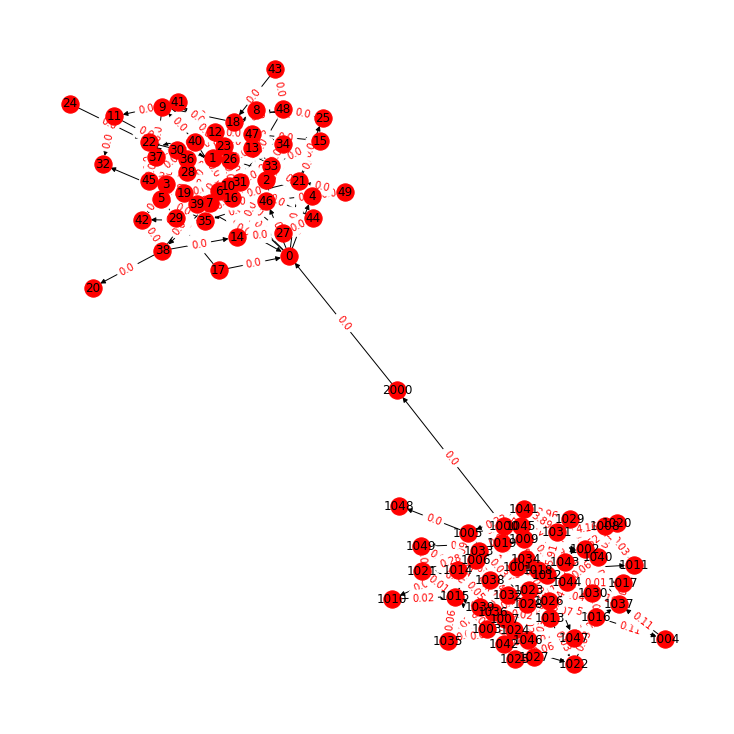

In [58]:
main(Graph3c, pos=nx.spring_layout(Graph3c))

In [59]:
Graph3d = get_graph(100, p = 0.05)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


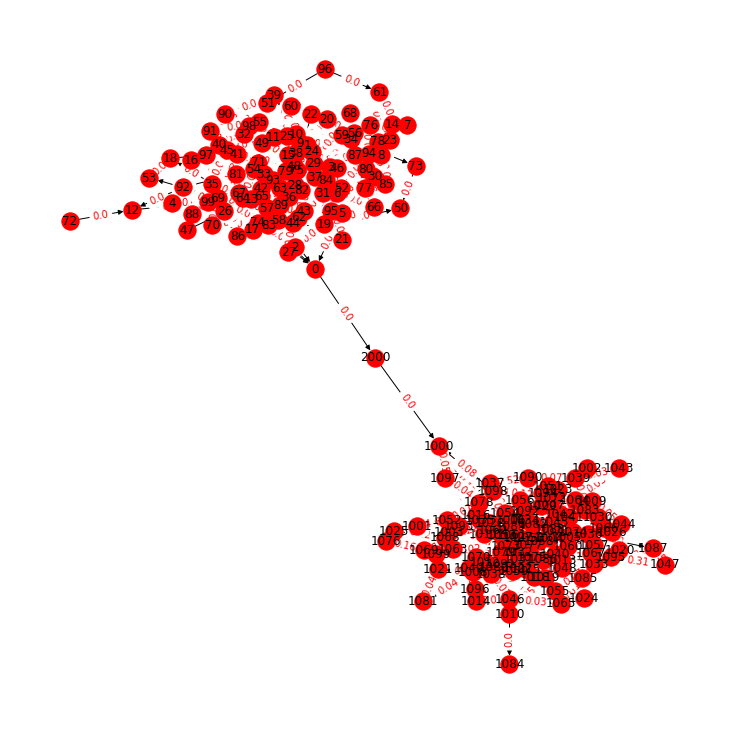

In [60]:
main(Graph3d, pos=nx.spring_layout(Graph3d))

### – Graf siatka 2D

In [61]:
Graph4a = nx.grid_2d_graph(4,4)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


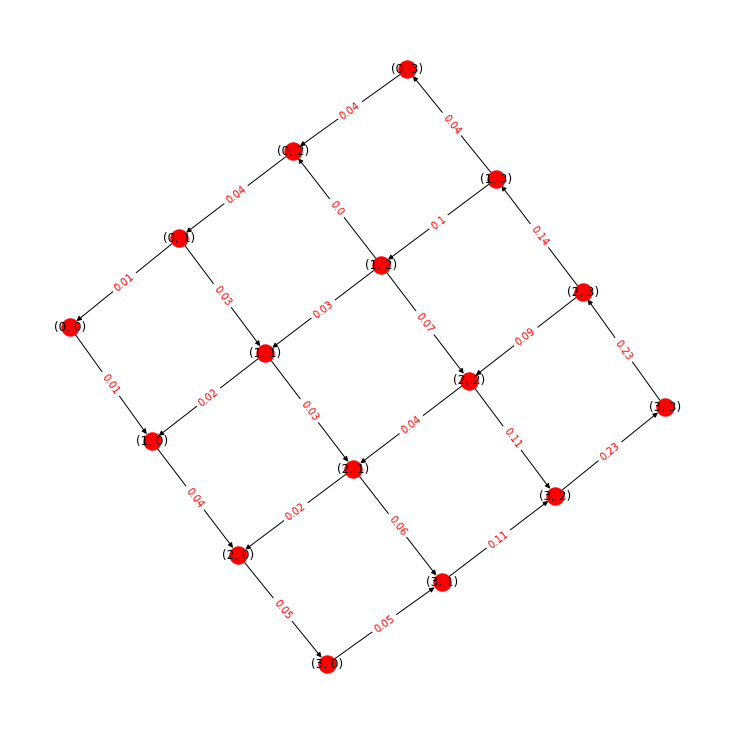

In [62]:
pos = nx.kamada_kawai_layout(Graph4a)
main(Graph4a, pos)

In [63]:
Graph4b = nx.grid_2d_graph(6,6)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


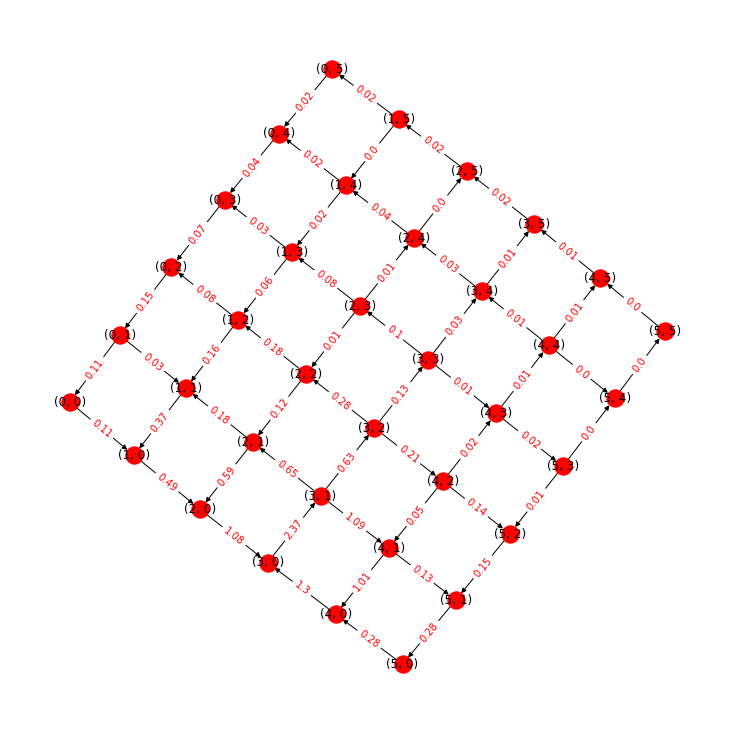

In [64]:
pos = nx.kamada_kawai_layout(Graph4b)
main(Graph4b, pos)

In [65]:
Graph4c = nx.grid_2d_graph(7,7)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


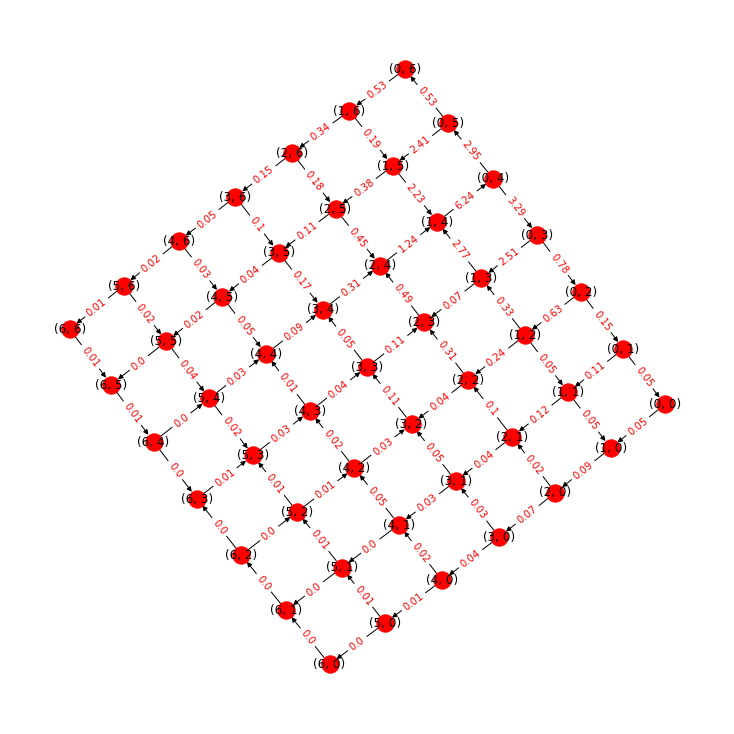

In [66]:
pos = nx.kamada_kawai_layout(Graph4c)
main(Graph4c, pos)

In [67]:
Graph4d = nx.grid_2d_graph(10,10)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


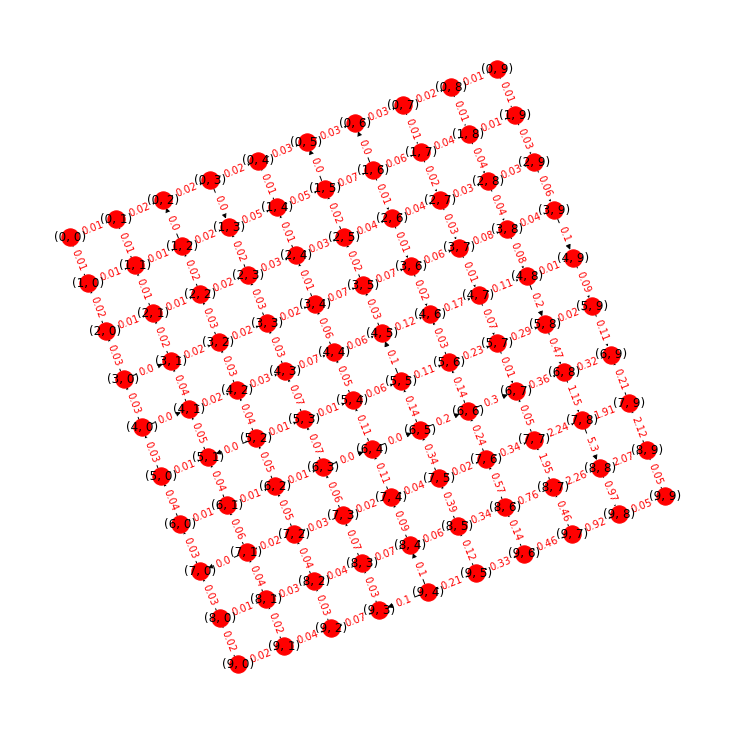

In [68]:
pos = nx.kamada_kawai_layout(Graph4d)
main(Graph4d, pos)

### – Graf typu small-world

In [69]:
Graph5a = nx.watts_strogatz_graph(15, 4, 0)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


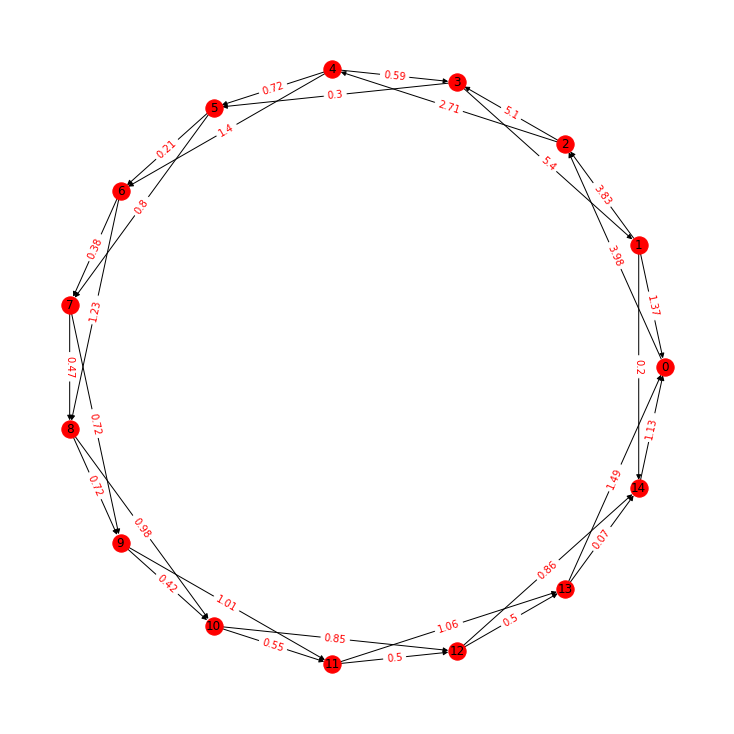

In [70]:
pos = nx.kamada_kawai_layout(Graph5a)
main(Graph5a, pos)

In [71]:
Graph5b = nx.watts_strogatz_graph(30, 4, 0)

1st Kirchhoff Rule check:  True
2nd Kirchhoff Rule check:  True


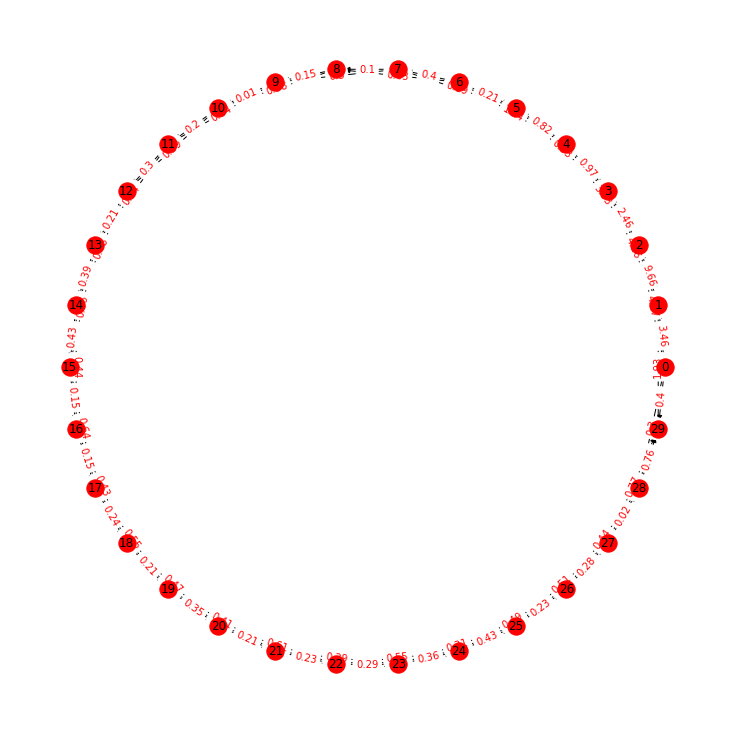

In [72]:
pos = nx.kamada_kawai_layout(Graph5b)
main(Graph5b, pos)

### e) W jaki sposób możemy rozwiązać nadokreślony układ równań. Opisz najważniejsze aspekty swojego rozwiązania (kierunek prądu, weryfikacja poprawności rozwiązania, sposób wyznaczania cykli prostych).

- Do utworzenia nadokreślonego układu równań używamy równań z pierwszego prawa Kirchhoffa oraz równań z drugiego prawa Kirchhoffa dla cykli należących do bazy cykli (funkcja cycle_basis z biblioteki networkx) aby nie tworzyć niepotrzebnie równań dla wszystkich istniejących cykli
- Układ nadokreślony rozwiązałem za pomocą funkcji lstsq z biblioteki numpy.linalg
- Odnośnie kierunku prądu, na początek przyjmujemy, że dla każdej krawędzi płynie on od wierzchołka o mniejszym indeksie do wierzchołka o większym indeksie, jeśli w rozwiązaniu otrzymamy ujemne natężenia prądu, będzie to oznaczało, że prąd na tej krawędzi płynie odwrotnie niż na początku przyjeliśmy
- Weryfikujemy rozwiązanie pod dwoma względami:
> 1. Stosując pierwsze prawo Kirchhoffa, tj. zliczając różnice między napięciami wchodzącymi i wychodzącymi z każdego wierzchołka<br>
> 2. Stosując drugie prawo Kirchhoffa dla cykli prostych otrzymanych dla grafu skierowanego z pomocą funkcji simple_cycles z biblioteki networkx. Dla każdego cyklu zliczamy napięcia * rezystancje na obwodzie i sumę porównujemy z istniejącą SEM na tym cyklu, lub z zerem gdy siły tej nie ma na cyklu